In [1]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
import os

os.chdir("C:/titanic")

plt.style.use('ggplot')

%matplotlib inline

In [67]:
# Data upload

DF = pd.read_csv('test.csv', sep=",", header=0, index_col=False)
DF

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
print('shape= ', DF.shape)
print('length= ', len(DF))

shape=  (891, 12)
length=  891


In [5]:
print(DF.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [6]:
DF.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Larsson, Mr. August Viktor",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [68]:
dct = {'male' : 0, 'female' : 1}
DF['Sex'] = DF['Sex'].map(dct)

In [69]:
DF = DF.drop(['Ticket', 'Cabin', 'Embarked', 'Name'], axis='columns')

In [58]:
#DF = DF.dropna()

In [70]:
DF

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,0,34.5,0,0,7.8292
1,893,3,1,47.0,1,0,7.0000
2,894,2,0,62.0,0,0,9.6875
3,895,3,0,27.0,0,0,8.6625
4,896,3,1,22.0,1,1,12.2875
5,897,3,0,14.0,0,0,9.2250
6,898,3,1,30.0,0,0,7.6292
7,899,2,0,26.0,1,1,29.0000
8,900,3,1,18.0,0,0,7.2292
9,901,3,0,21.0,2,0,24.1500


In [71]:
DF.to_csv('test1.csv', sep=',', index=False)

In [27]:
#print(DF.groupby(['MS Zoning', 'SalePrice'])['SalePrice'].max())

In [28]:
#pvt = DF.pivot_table(index=['Street'], columns=['MS Zoning'], values='MS SubClass', aggfunc='count')

In [29]:
#print(pvt.loc['Pave', ['RM', 'RL']])

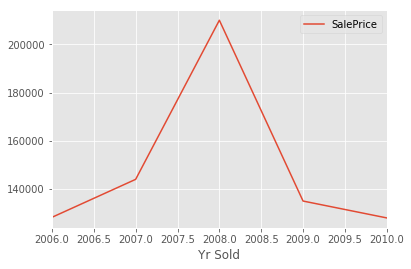

In [37]:
DF.index.name = 'Yr Sold'
dfsales = DF.loc['2006':'2010', ['SalePrice']]
dfsales.plot()

In [34]:
#DF.index.name = 'Order'
#DF[DF.SalePrice > 200000][['MS Zoning', 'SalePrice']]

In [30]:
#DF[DF['MS Zoning'] == 'RL'][DF.SalePrice > 300000][['MS Zoning', 'SalePrice']]

In [31]:
#DF[DF.SalePrice == min(DF.SalePrice)]

In [32]:
#DF = DF.fillna(method='ffill')

In [33]:
#DF.loc[DF['MS Zoning'] != 'RL']